In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_csv('/content/sample_data/US_YT_Trending_Data (1).csv')

In [ ]:
df.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


In [ ]:
check=df['title'].unique()
len(check)

48471

In [ ]:
#split up the time
df['publishing_date']=df['publishedAt'].apply(lambda x: x.split('T')[0])
df['trending_d']=df['trending_date'].apply(lambda x: x.split('T')[0])
df['publishing_time']=df['publishedAt'].apply(lambda x: x.split('T')[1])
df['trending_time']=df['trending_date'].apply(lambda x: x.split('T')[1])

df['p_date'] = pd.to_datetime(df['publishing_date'])
df['p_month']=df['p_date'].dt.month
df['p_day_of_week']=df['p_date'].dt.dayofweek
df['p_weekend']=[1 if x>5 else 0 for x in df['p_day_of_week']]


#dont look at the total number of views standard number to be view / day
#take into account the number of days since it was published and then predict the normalized view count for number of days it has been published
#transformation with the number of days video has been around: calculate number of days that the video has been active. daytime extraction
#features: remove publishe date and have something around if it was published on a weekend or a weekday
df['days_trending']=(pd.to_datetime(df['trending_d'])-pd.to_datetime(df['publishing_date'])).dt.days
df['view_span']=df['view_count']/df['days_trending']


#winter =1 spring =2 summer =3 fall=4
df['p_season']=[1 if x in [12,1,2] else 2 if x in [3,4,5] else 3 if x in [6,7,8] else 4 for x in df['p_month']]

df['t_date'] = pd.to_datetime(df['trending_d'])
df['t_month']=df['t_date'].dt.month
df['t_day_of_week']=df['t_date'].dt.dayofweek
df['t_weekend']=[1 if x>5 else 0 for x in df['t_day_of_week']]

#winter =1 spring =2 summer =3 fall=4
df['t_season']=[1 if x in [12,1,2] else 2 if x in [3,4,5] else 3 if x in [6,7,8] else 4 for x in df['t_month']]

df.drop('publishedAt',axis=1,inplace=True)
df.drop('trending_date',axis=1,inplace=True)
df['publishing_date'] = df['publishing_date'].str.replace('-', ' ')
df['trending_d'] = df['trending_d'].str.replace('-', '')
df['publishing_time'] = df['publishing_time'].str.replace('Z', '')
df['trending_time'] = df['trending_time'].str.replace('Z', '')
df.drop('publishing_date',axis=1,inplace=True)
df.drop('trending_d',axis=1,inplace=True)
df.drop('p_date',axis=1,inplace=True)
df.drop('t_date',axis=1,inplace=True)
df.drop('p_month',axis=1,inplace=True)
df.drop('t_month',axis=1,inplace=True)
df.drop('p_day_of_week',axis=1,inplace=True)
df.drop('t_day_of_week',axis=1,inplace=True)
df

,video_id,title,channelId,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,...,ratings_disabled,description,publishing_time,trending_time,p_weekend,days_trending,view_span,p_season,t_weekend,t_season
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,...,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,19:20:14,00:00:00,0,1,1.514614e+06,3,0,3
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,...,False,"While running her own modding shop, Ramya Pare...",17:00:10,00:00:00,0,1,2.381688e+06,3,0,3
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,...,False,I left youtube for a month and this is what ha...,16:34:06,00:00:00,0,1,2.038853e+06,3,0,3
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,UCbg_UMjlHJg_19SZckaKajg,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,...,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,16:38:55,00:00:00,0,1,4.967710e+05,3,0,3
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,...,False,Transforming The LaBrant Family's empty white ...,15:10:05,00:00:00,0,1,1.123889e+06,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,...,False,Millions of people in the United States are tr...,15:55:44,00:00:00,0,7,5.130429e+04,2,0,2
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,[None],3998181,107811,0,10335,...,False,"John Oliver discusses food delivery apps, how ...",11:00:02,00:00:00,0,11,3.634710e+05,2,0,2
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,...,False,We reveal 12 things no-one tells you to expect...,14:53:25,00:00:00,1,8,1.092450e+05,2,0,2
268785,84QeCD7y_Ds,Buying My Dream Car At 21,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,...,False,Use code JOE at checkout to get discounts on M...,18:00:03,00:00:00,1,8,6.698025e+04,2,0,2


In [ ]:
df['trending_time'].unique()

array(['00:00:00'], dtype=object)

In [ ]:
df.drop('trending_time',axis=1,inplace=True)


In [ ]:
df.drop('days_trending',axis=1,inplace=True)

In [ ]:

df['likes_growth_rate'] = df.groupby('video_id')['likes'].pct_change().fillna(0)
#DID NOT include this in features because I added view_span instead! view_span has larger feature importance
df['view_count_growth_rate'] = df.groupby('video_id')['view_count'].pct_change().fillna(0)
df['comment_count_growth_rate'] = df.groupby('video_id')['comment_count'].pct_change().fillna(0)
df['view_span']=np.log(df['view_span'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df=df.reset_index(drop=True)
df.dropna(inplace=True)
df['log_view_count'] = np.log(df['view_count'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

y=df['log_view_count']
X=df[['categoryId', 'likes', 'comment_count', "p_season","p_weekend", "t_season","view_span","t_weekend", 'likes_growth_rate', 'comment_count_growth_rate']]

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=1234)

In [ ]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_scaled,y)
feature_importances = gb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,view_span,0.638148
1,likes,0.241717
8,likes_growth_rate,0.112097
9,comment_count_growth_rate,0.004868
0,categoryId,0.001996
2,comment_count,0.000727
3,p_season,0.000355
5,t_season,0.000047
7,t_weekend,0.000034
4,p_weekend,0.000010


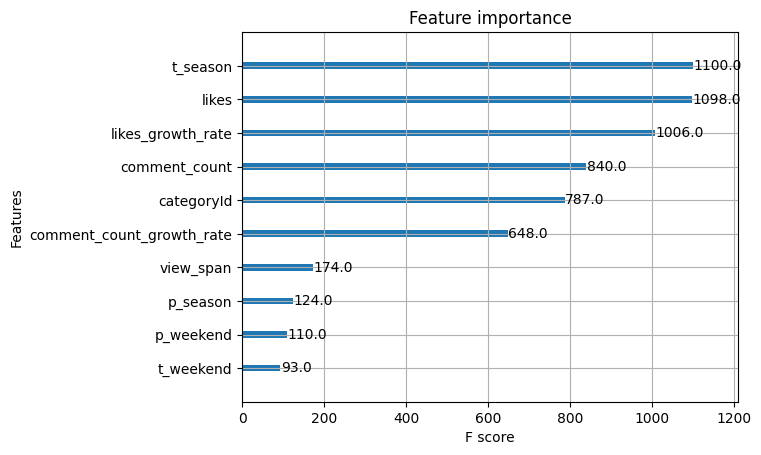

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance
xgb = XGBRegressor(n_estimators=100)
#day of week it is relevant or not
#summertime or not?
#seasonal? ==> based on the month
xgb.fit(X_train, y_train)
xgb.feature_importances_
xgb.get_booster().feature_names = ['categoryId', 'likes', 'comment_count', "view_span","p_season","p_weekend", "t_season","t_weekend", 'likes_growth_rate', 'comment_count_growth_rate']
plot_importance(xgb)
plt.show()


In [ ]:
df['categoryId'].value_counts()

,count
categoryId,
20,52799
24,52744
10,42816
17,31067
22,21477
23,12666
1,10748
25,9575
28,8062


In [ ]:
df['channelTitle'].value_counts()

,count
channelTitle,
NFL,1791
NBA,1489
MrBeast,1126
NBC Sports,802
Dude Perfect,699
...,...
Mat Watson Cars,1
Helmut,1
MegaToons,1


In [ ]:

#hyptertuning to find the best value for n estimators and max depth
num_examples=X_train.shape[0]
grid = dict()
grid['n_estimators'] = np.arange(10,500)
grid['max_depth'] = np.arange(3,10)
grid_search = GridSearchCV(estimator=gb_model, param_grid=grid, cv=5)
grid_search=grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
gbdt_model = GradientBoostingRegressor(max_depth = 4, n_estimators = 300)
gbdt_model.fit(X_train, y_train)
print('End')

End


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_GBDT_pred = gbdt_model.predict(X_test)
# 2. Compute the RMSE
gbdt_rmse = mean_squared_error(y_test, y_GBDT_pred)
# 3. Compute the R2 score
gbdt_r2 = r2_score(y_test, y_GBDT_pred)
print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 0.08751111068791681
[GBDT] R2: 0.9337031148319267


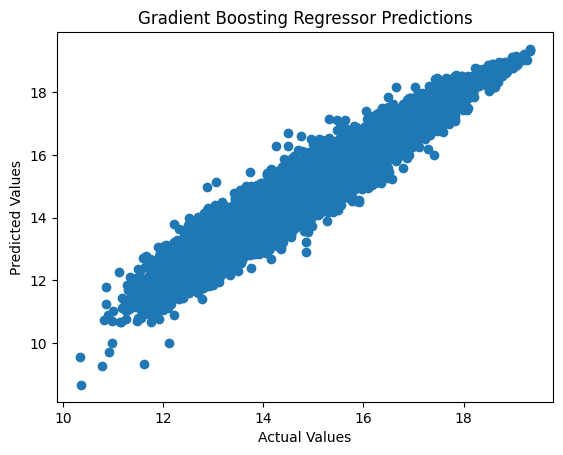

In [ ]:
plt.scatter(y_GBDT_pred, y_test)

plt.xlabel("Actual Values")

plt.ylabel("Predicted Values")

plt.title("Gradient Boosting Regressor Predictions")

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_GBDT_pred,y_test)
# Plot the ROC curve

plt.plot(fpr, tpr, label='ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

ValueError: continuous format is not supported